## RFM Analysis 

Analysis of two years worth of online transaction data from UK online retailer.

link: https://archive.ics.uci.edu/dataset/502/online+retail+ii

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

#Loading Data
rfm_data = pd.read_csv("C:/Users/james/Downloads/online_retail_II.csv")
rfm_data2 = pd.read_csv("C:/Users/james/Downloads/online_retail_III.csv")

rfm_df = pd.concat([rfm_data, rfm_data2], ignore_index=True)

print(rfm_df.isna().sum())
rfm_df = rfm_df.dropna(subset=['Customer ID'])

rfm_df['TotalPrice'] = rfm_df['Quantity'] * rfm_df['Price']
print(rfm_df.head())
print(rfm_df.tail())




Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64
  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

      InvoiceDate  Price  Customer ID         Country  TotalPrice  
0  12/1/2009 7:45   6.95      13085.0  United Kingdom        83.4  
1  12/1/2009 7:45   6.75      13085.0  United Kingdom        81.0  
2  12/1/2009 7:45   6.75      13085.0  United Kingdom        81.0  
3  12/1/2009 7:45   2.10      13085.0  United Kingdom       100.8  
4  12/1/2009 7:45   1.25      13085.0  United King

# Intial Data Insights

In [186]:
unique_sc = rfm_df['StockCode'].nunique()
print(f"Unique Stock Codes: {unique_sc}")
unique_id = rfm_df['Customer ID'].nunique()
print(f"Unique Customer IDs: {unique_id}")
unique_locations = rfm_df['Country'].nunique()
print(f"Unique Locations: {unique_locations}")
unique_desc = rfm_df['Description'].nunique()
print(f"Unique Descriptions: {unique_desc}")



Unique Stock Codes: 4646
Unique Customer IDs: 5942
Unique Locations: 41
Unique Descriptions: 5299


     StockCode  Total Quantity
3423     84077          107489
4071    85099B           93766
603      21212           90249
4093    85123A           90065
3832     84879           79434
1413     22197           77162
108      17003           70390
1226     21977           55051
3951     84991           53169
1681     22492           44528


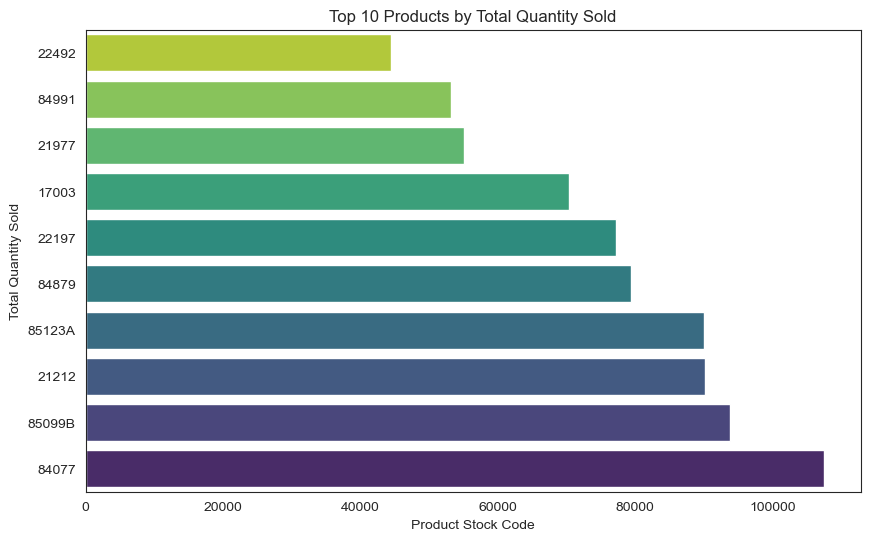

In [461]:
desc_count = rfm_df.groupby('StockCode')['Quantity'].sum().reset_index(name='Total Quantity')
desc_count = desc_count.sort_values(by='Total Quantity', ascending=False)
desc_count = desc_count.head(10)
print(desc_count)

plt.figure(figsize=(10, 6))
sns.barplot(x='Total Quantity', y='StockCode', orient= 'h', hue='StockCode', data=desc_count, palette='viridis')
plt.title('Top 10 Products by Total Quantity Sold')
plt.xlabel('Product Stock Code')
plt.ylabel('Total Quantity Sold')
plt.gca().invert_yaxis()
plt.show()


     StockCode  Total Sales
1617     22423    269736.70
4093    85123A    242855.86
4071    85099B    168440.36
3832     84879    126354.18
4642      POST    112249.10
3069     47566    102686.23
1306     22086     78366.93
3332     79321     72229.34
1586     22386     67574.16
547      21137     67127.15


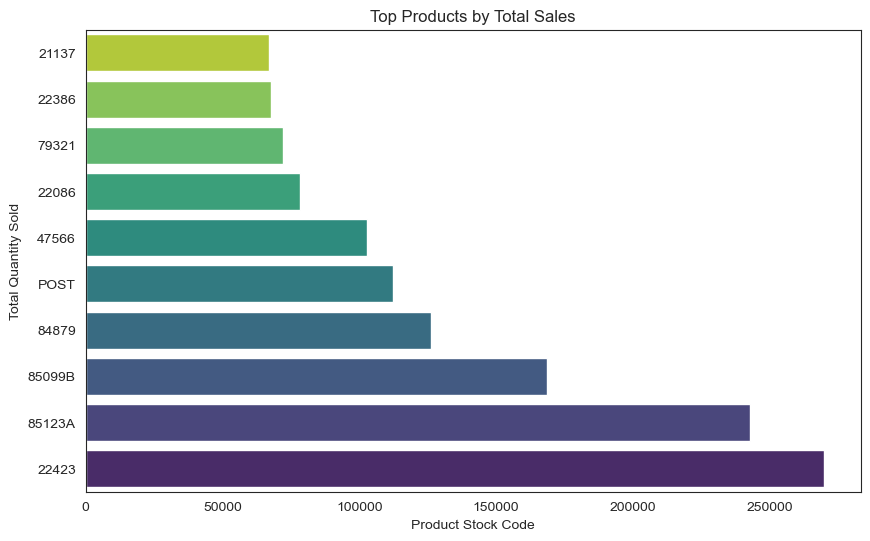

In [455]:
top_gross = rfm_df.groupby('StockCode')['TotalPrice'].sum().reset_index(name='Total Sales')
top_gross = top_gross.sort_values(by='Total Sales', ascending=False)
top_gross = top_gross.head(10)
print(top_gross)

plt.figure(figsize=(10, 6))
sns.barplot(x='Total Sales', y='StockCode', orient= 'h', hue='StockCode', data=top_gross, palette='viridis')
plt.title('Top Products by Total Sales')
plt.xlabel('Product Stock Code')
plt.ylabel('Total Quantity Sold')
plt.gca().invert_yaxis()
plt.show()

In [189]:
# Calculate Recency
rfm_df['InvoiceDate'] = pd.to_datetime(rfm_df['InvoiceDate'], format='mixed')

now = datetime(2011, 12, 9)

rfm_df['Recency'] = (now - rfm_df['InvoiceDate']).dt.days

# Calculate Frequency
frequency_data = rfm_df.groupby('Customer ID')['Invoice'].count().reset_index()
frequency_data.rename(columns={'Invoice': 'Frequency'}, inplace=True)
rfm_df = rfm_df.merge(frequency_data, on='Customer ID', how='left')

# Calculate Monetary Value
monetary_data = rfm_df.groupby('Customer ID')['TotalPrice'].sum().reset_index()
monetary_data.rename(columns={'TotalPrice': 'MonetaryValue'}, inplace=True)
rfm_df = rfm_df.merge(monetary_data, on='Customer ID', how='left')

print(rfm_df.head())

  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  TotalPrice  \
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom        83.4   
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom        81.0   
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom        81.0   
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom       100.8   
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom        30.0   

   Recency  Frequency  MonetaryValue  
0      737         92        1459.46  
1      737         92        1459.46  
2      737         92  

# Who Are The Top Customers? 

Here we will examine which customers buy the most items, who has spent the most, and correlation between Recency, Frequency and Monetary Value. 

In [190]:
cust_scores_df = rfm_df[['Customer ID', 'Recency', 'Frequency', 'MonetaryValue']]
cust_scores_df = cust_scores_df.drop_duplicates(subset=['Customer ID'])



cust_scores_df.sort_values(['Frequency', 'MonetaryValue'], ascending=[False, False], inplace=True)
print(cust_scores_df.head(10))


        Customer ID  Recency  Frequency  MonetaryValue
4272        17841.0      736      13097       69516.19
437         14911.0      737      11613      270248.53
8949        12748.0      734       7307       49970.13
5440        14606.0      735       6709       30094.38
648440      14096.0      100       5128       57120.91
326         15311.0      737       4717      113513.07
994         14156.0      737       4130      296564.69
4547        14646.0      736       3890      523342.07
4367        13089.0      736       3438      113214.19
6724        16549.0      735       3255       13159.64


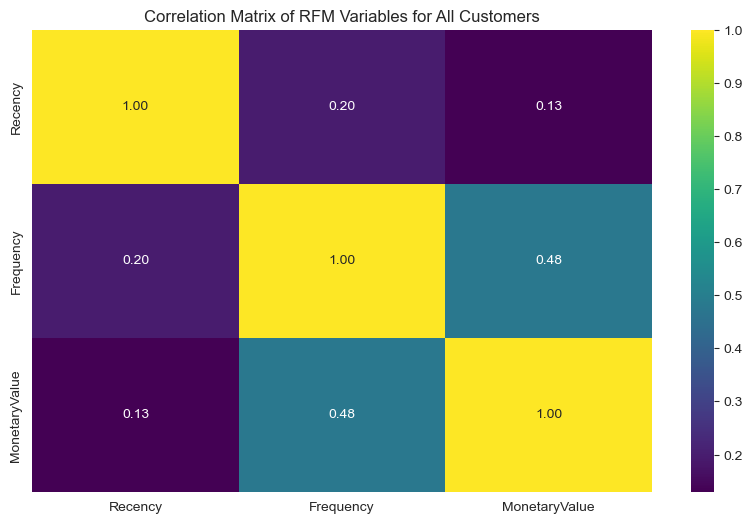

In [456]:
cust_correlation = cust_scores_df[['Recency', 'Frequency', 'MonetaryValue']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(cust_correlation, annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Matrix of RFM Variables for All Customers')
plt.show()

Moderately high correlation (.48) between Frequency and Monetary Value suggests the more orders a customer places the more they will spend. Relatively low positive correlation between Recency(days since last purchase) and Monetary value as well as Recency and Frequency. 

In [192]:
cust_mon = cust_scores_df.groupby('Customer ID')['MonetaryValue'].sum().reset_index().sort_values(by='MonetaryValue', ascending=False)
print(cust_mon.head(10))



      Customer ID  MonetaryValue
5756      18102.0      598215.22
2300      14646.0      523342.07
1810      14156.0      296564.69
2565      14911.0      270248.53
5104      17450.0      233579.39
1348      13694.0      190825.52
5165      17511.0      171885.98
69        12415.0      143269.29
4338      16684.0      141502.25
2715      15061.0      136391.48


# RFM Scoring

In [ ]:
# Scoring criteria for each RFM value
recency_scores = [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]  # Higher score for lower recency (more recent)
frequency_scores = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]  # Higher score for higher frequency
monetary_scores = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]  # Higher score for higher monetary value

# Calculate RFM scores
cust_scores_df['RecencyScore'] = pd.cut(cust_scores_df['Recency'], bins=10, labels=recency_scores)
cust_scores_df['FrequencyScore'] = pd.cut(cust_scores_df['Frequency'], bins=10, labels=frequency_scores)
cust_scores_df['MonetaryScore'] = pd.cut(cust_scores_df['MonetaryValue'], bins=10, labels=monetary_scores)

cust_scores_df['RecencyScore'] = cust_scores_df['RecencyScore'].astype(int)
cust_scores_df['FrequencyScore'] = cust_scores_df['FrequencyScore'].astype(int)
cust_scores_df['MonetaryScore'] = cust_scores_df['MonetaryScore'].astype(int)

In [ ]:
cust_scores_df['RFM_Score'] = cust_scores_df['RecencyScore'] + cust_scores_df['FrequencyScore'] + cust_scores_df['MonetaryScore']
print(cust_scores_df.head(10))

from sklearn.cluster import KMeans

# KMeans clustering to segment customers based on RFM score
kmeans = KMeans(n_clusters=3, random_state=42)
cust_scores_df['Value Segment'] = kmeans.fit_predict(cust_scores_df[['RFM_Score']])

print(cust_scores_df.head(10))



        Customer ID  Recency  Frequency  MonetaryValue  RecencyScore  \
4272        17841.0      736      13097       69516.19             1   
437         14911.0      737      11613      270248.53             1   
8949        12748.0      734       7307       49970.13             1   
5440        14606.0      735       6709       30094.38             1   
648440      14096.0      100       5128       57120.91             9   
326         15311.0      737       4717      113513.07             1   
994         14156.0      737       4130      296564.69             1   
4547        14646.0      736       3890      523342.07             1   
4367        13089.0      736       3438      113214.19             1   
6724        16549.0      735       3255       13159.64             1   

        FrequencyScore  MonetaryScore  RFM_Score  Value Segment  
4272                10              2         13              1  
437                  9              5         15              1  
8949     

In [196]:
segs = cust_scores_df.groupby('Value Segment')['RFM_Score'].mean().reset_index()
print(segs)

cust_scores_df['Value Segment'] = cust_scores_df['Value Segment'].map({0: 'Low-Value', 1: 'High-Value', 2: 'Mid-Value'})

   Value Segment  RFM_Score
0              0   3.705199
1              1  10.671897
2              2   6.834373


Value Segment
Low-Value     3097
Mid-Value     1443
High-Value    1402
Name: count, dtype: int64


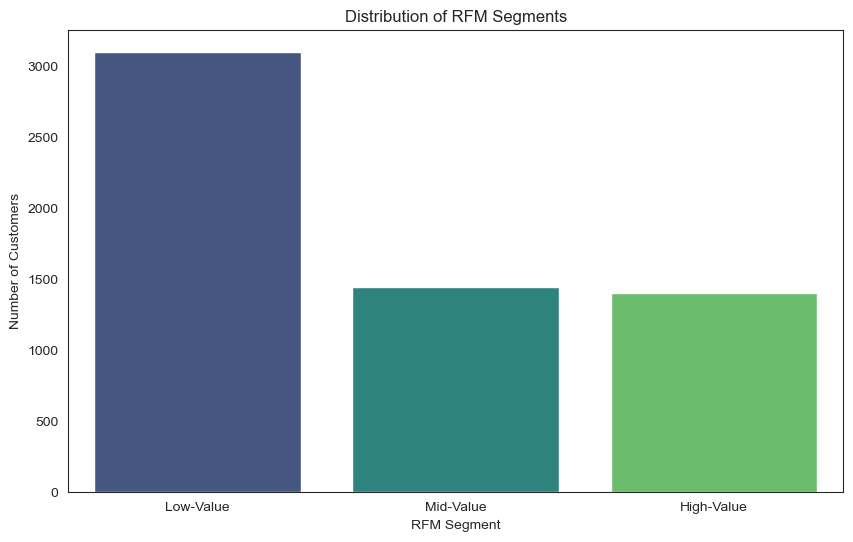

In [457]:
segment_counts = cust_scores_df['Value Segment'].value_counts()

print(segment_counts)

plt.figure(figsize=(10, 6))
sns.barplot(x=segment_counts.index, y=segment_counts.values, hue=segment_counts.index, palette='viridis', legend=None)
plt.title('Distribution of RFM Segments')
plt.xlabel('RFM Segment')
plt.ylabel('Number of Customers')
plt.show()

In [198]:
print(cust_scores_df['RFM_Score'].describe())

count    5942.000000
mean        6.108886
std         2.968231
min         3.000000
25%         3.000000
50%         5.000000
75%         8.000000
max        15.000000
Name: RFM_Score, dtype: float64


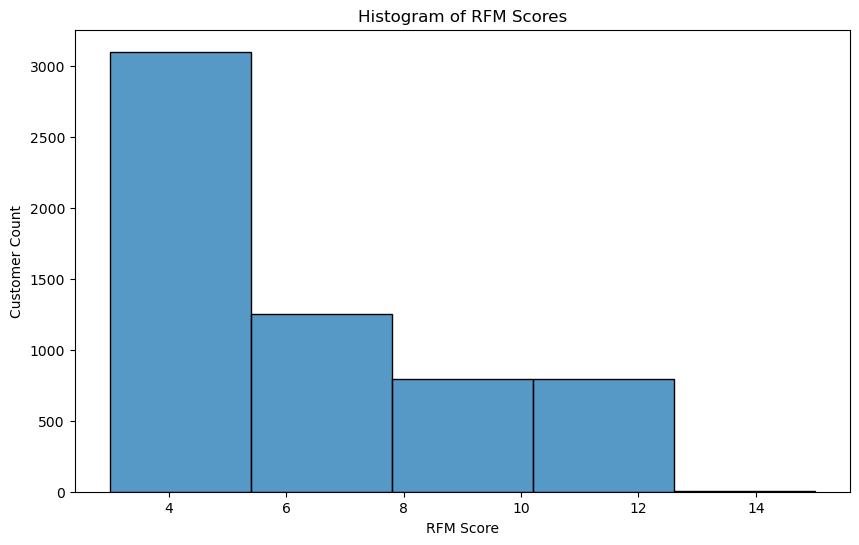

In [199]:
plt.figure(figsize=(10, 6))
sns.histplot(cust_scores_df['RFM_Score'], bins=5)
plt.title('Histogram of RFM Scores')
plt.xlabel('RFM Score')
plt.ylabel('Customer Count')
plt.show()

# Futher Segmentation

In [ ]:
# Create a new column for RFM Customer Segments

cust_scores_df['RFM Customer Segments'] = ''

# Assign RFM segments based on the RFM score
cust_scores_df.loc[(cust_scores_df['RFM_Score'] >= 11), 'RFM Customer Segments'] = 'Top Tier Customers'
cust_scores_df.loc[(cust_scores_df['RFM_Score'] >= 8) & (cust_scores_df['RFM_Score'] < 11 ), 'RFM Customer Segments'] = 'Borderline Top Tier'
cust_scores_df.loc[(cust_scores_df['RFM_Score'] >= 5) & (cust_scores_df['RFM_Score'] < 8), 'RFM Customer Segments'] = "On the Fence"
cust_scores_df.loc[(cust_scores_df['RFM_Score'] >= 4) & (cust_scores_df['RFM_Score'] < 5), 'RFM Customer Segments'] = "Can't Lose"
cust_scores_df.loc[(cust_scores_df['RFM_Score'] >= 3) & (cust_scores_df['RFM_Score'] < 4), 'RFM Customer Segments'] = "Lost"

In [201]:
segment_product_counts = cust_scores_df.groupby(['Value Segment', 'RFM Customer Segments']).size().reset_index(name='Count')

print(segment_product_counts.sort_values(by='Count', ascending=False))


  Value Segment RFM Customer Segments  Count
3     Low-Value                  Lost   1550
6     Mid-Value          On the Fence   1253
2     Low-Value            Can't Lose    910
1    High-Value    Top Tier Customers    800
4     Low-Value          On the Fence    637
0    High-Value   Borderline Top Tier    602
5     Mid-Value   Borderline Top Tier    190


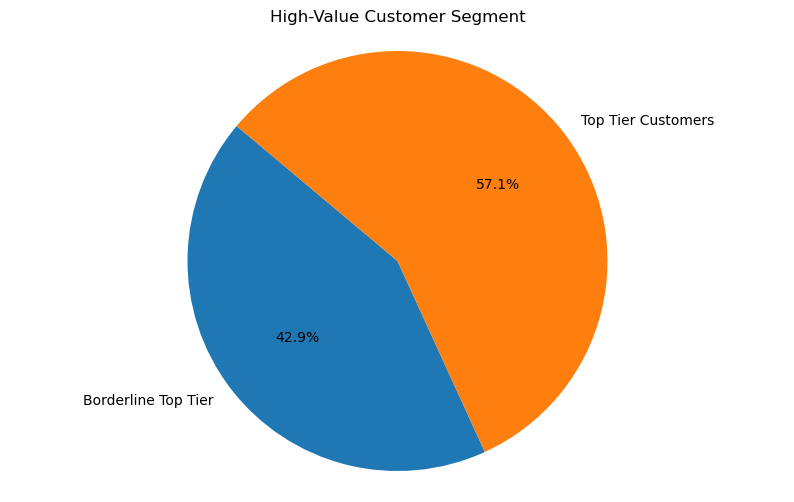

In [202]:
high_value = segment_product_counts[segment_product_counts['Value Segment'] == 'High-Value'] 

plt.figure(figsize=(10, 6))
plt.pie(high_value['Count'], labels=high_value['RFM Customer Segments'], autopct='%1.1f%%', startangle=140)
plt.title('High-Value Customer Segment')
plt.axis('equal')  
plt.show()

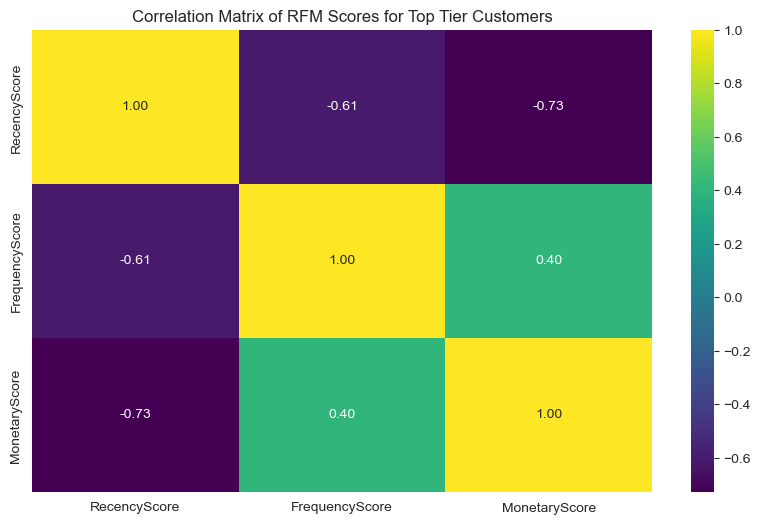

In [458]:
# Correlation between RFM scores for Top Tier Customers
best_cust = cust_scores_df[cust_scores_df['RFM Customer Segments'] == 'Top Tier Customers']
corr_matrix = best_cust[['RecencyScore', 'FrequencyScore', 'MonetaryScore']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Matrix of RFM Scores for Top Tier Customers')
plt.show()

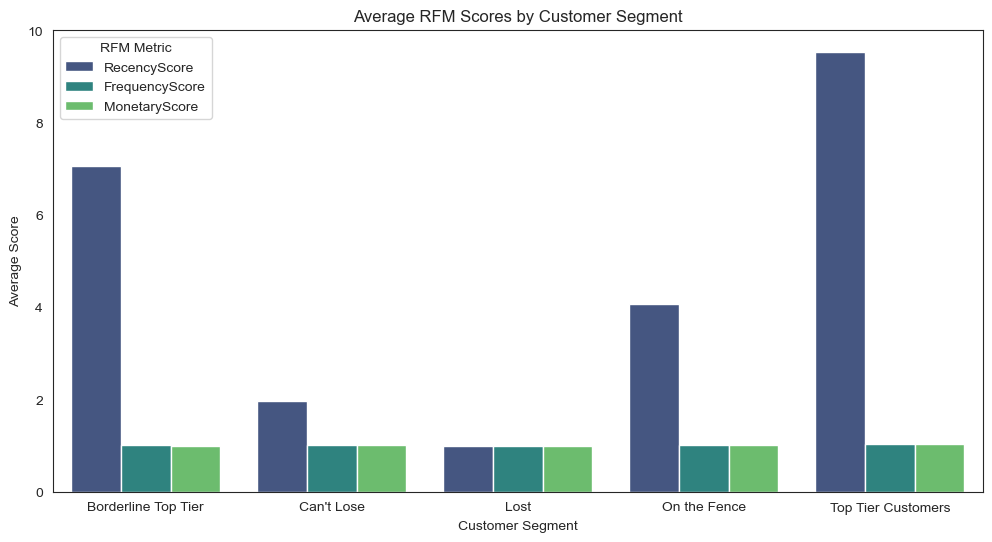

In [459]:
seg_scores_df = cust_scores_df.groupby('RFM Customer Segments')[['RecencyScore', 'FrequencyScore', 'MonetaryScore']].mean().reset_index()

seg_scores_melted = seg_scores_df.melt(id_vars='RFM Customer Segments', 
                                       value_vars=['RecencyScore', 'FrequencyScore', 'MonetaryScore'],
                                       var_name='RFM Metric', value_name='Average Score')

plt.figure(figsize=(12, 6))
sns.barplot(data=seg_scores_melted, x='RFM Customer Segments', y='Average Score', hue='RFM Metric', palette='viridis')
plt.title('Average RFM Scores by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Average Score')
plt.legend(title='RFM Metric')
plt.show()


#  High Value Customers Insights

Examining behavior of High Value Customers(Top Tier and Borderline Top Tier)

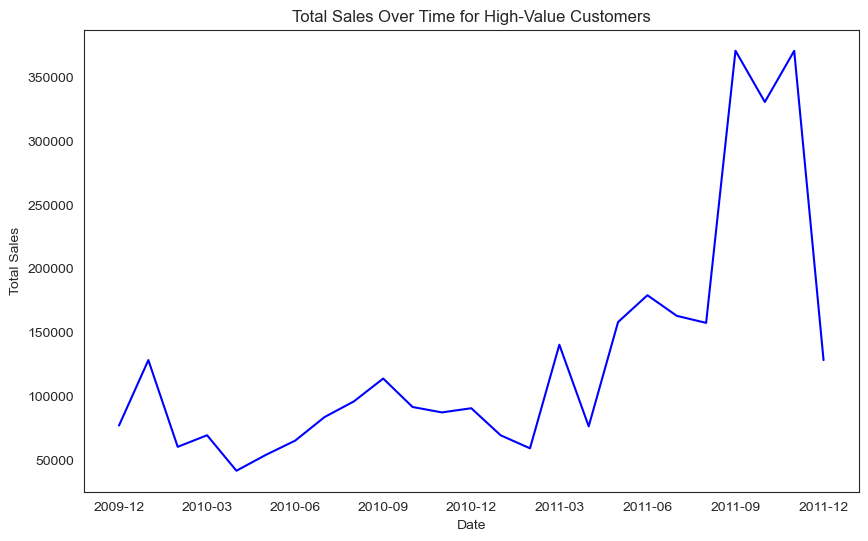

In [ ]:

top_tier = cust_scores_df[cust_scores_df['Value Segment'] == 'High-Value']
top_tier_sales = rfm_df[rfm_df['Customer ID'].isin(top_tier['Customer ID'])]
plot_df = top_tier_sales.copy()

plot_df['InvoiceDate'] = pd.to_datetime(plot_df['InvoiceDate']).dt.strftime('%Y-%m')

daily_sales = plot_df.groupby('InvoiceDate')['TotalPrice'].sum().reset_index()



plt.figure(figsize=(10, 6))
sns.lineplot(data=daily_sales, x='InvoiceDate', y='TotalPrice', color='blue')
plt.title('Total Sales Over Time for High-Value Customers')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))  
plt.show()

In [468]:
top_cust_sales = daily_sales['TotalPrice'].sum()

print(f" High Value Customers have generated ${top_cust_sales:.2f} in sales.")


 High Value Customers have generated $3253945.18 in sales.


Sudden spike in sales between September and December. The holiday season may be the reason for this jump but sales have come back down to earth in December. We would need more data to fully understand this spike. 

C:\Users\james\AppData\Local\Temp\ipykernel_52640\3032703887.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_tier_sales['Weekday'] = top_tier_sales['InvoiceDate'].dt.day_name()


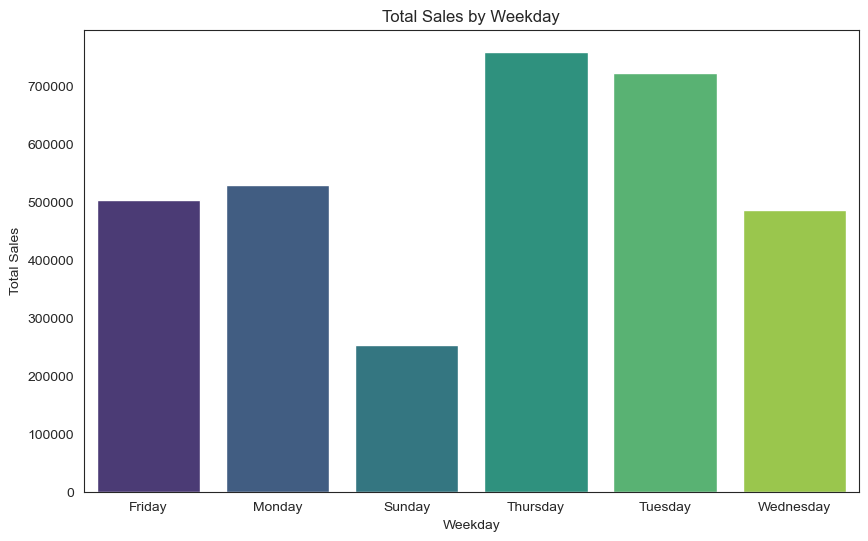

In [460]:

top_tier_sales['Weekday'] = top_tier_sales['InvoiceDate'].dt.day_name()

avg_week = top_tier_sales.groupby('Weekday')['TotalPrice'].sum().reset_index()


plt.figure(figsize=(10, 6))
sns.barplot(data=avg_week, x='Weekday', y='TotalPrice', hue='Weekday', palette='viridis')
plt.title('Total Sales by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Total Sales')
plt.show()

Tuesday's and Thursday's are the days in which high value customers purchase the most items. Emails could be sent out on these days to futher encourage this segment of customers to shop online. Interestingly in this segment no one has made a purchase on Saturday. 